<a href="https://colab.research.google.com/github/AMG0211/Project/blob/main/ML_Portfolio_Alejandro_Montes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

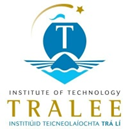  
######Machine Learning/Data for IoT-50618 (COMP81009)

#ML SOLUTION FOR SOLAR POWER GENERATION PREDICTION


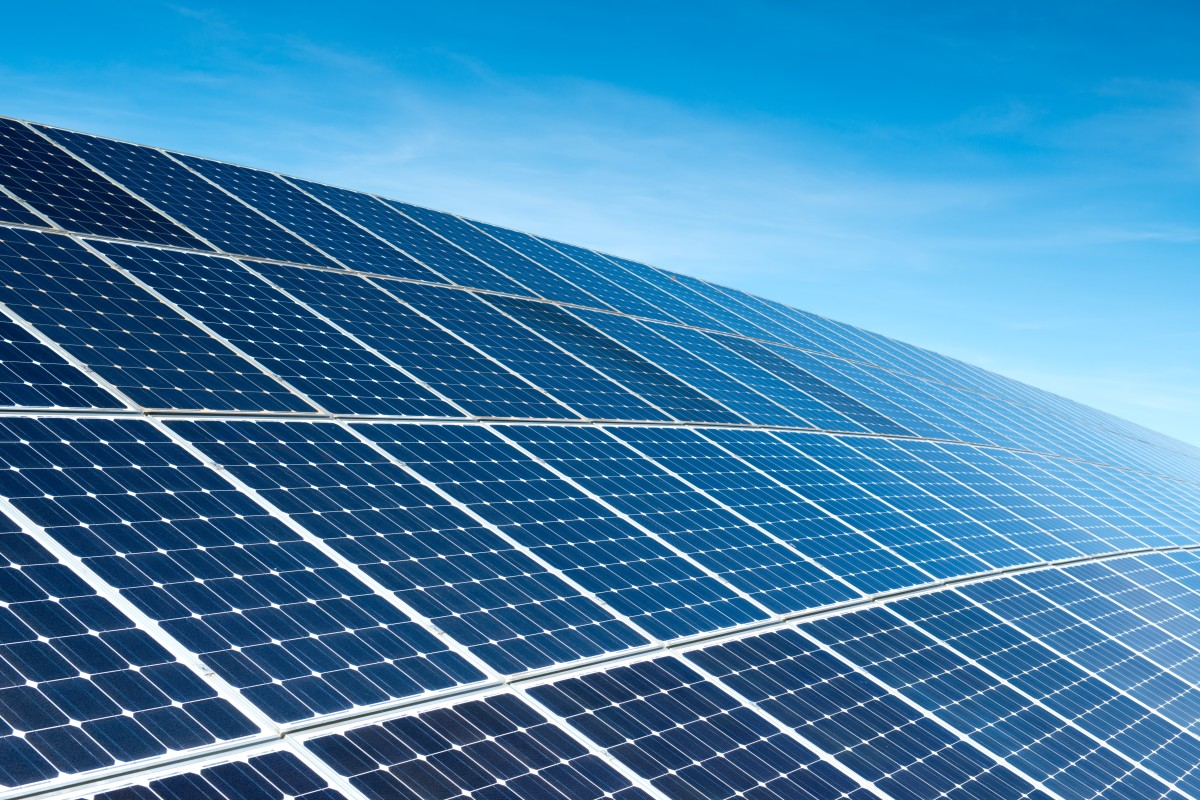

## Background  
Solar power generation plants generally consist in a big extension of land covered with photovoltaic panels made of small silicon cells that capture the sunlight and transform it into electricity. In the set-up, we can find two main pieces of equipment that do the job. On one side, we have the panels that capture the sunlight and convert it into DC (Direct current) electricity. Connected to these panels we have the inverter and its main function is to transform the DC power into AC power and send it to the main network for distribution.
In power generation plants, like in any other type of industry that produces an outcome, it is very interesting and cost effective, to be able to predict those outcomes. That very valuable information represents a big step forward for plant and production management as it is a big help in improving planning, forecasting and in resource and money allocation.  





##Objectives  
The main objective of this project will be constructing, training and validating a ML solution to predict the power generation of a power plant based in a data set gathered over a 34 days period and contains the power produced and weather sensor readings. In addition, during the development of the ML solution I will be able to learn how to analyse and evaluate data sets, compare different parameters and see how they relate to each other. That learning curve will give me a very good vision of the potential of these ML tools and solutions and the impact that they can have in decision making within industry at any level.  

##Method  
Based in the set of data provided we could see that the outcome that I will try to predict is continuous so having that in mind I will be looking at using supervised learning algorithms. The main objective is to generate a ML learning solution using the Random Forest algorithm training and testing it over a pre-processed data set. As the second part of the project, I will try to compare Random Forest and Linear regression algorithms and evaluate their performance and suitability as a solution for the problem stated. The project will be developed using the Google Colab and GitHub platforms. The programing language will be Python along with Scikit Learn libraries.

##  1 LOADING DATA AND LIBRARIES  
We will start loading the libraries and the data sets that will be required for this analysis, and we will have a first look at the data sets details.






In [3]:
# Data manipulation & analysis
import pandas as pd
import datetime as dt
# Linear Algebra
import numpy as np
# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
# ML models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression



In [4]:
# Loading data sets
generation_data = pd.read_csv("https://raw.githubusercontent.com/AMG0211/Project/main/Porject%20data/Plant_1_Generation_Data.csv")
weather_data = pd.read_csv("https://raw.githubusercontent.com/AMG0211/Project/main/Porject%20data/Plant_1_Weather_Sensor_Data.csv")

In [5]:
generation_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [6]:
# Combined details for Power generation data
print("SOLAR POWER GENERATION DATA SET DETAILS\n")
generation_data.info()
print('\n')
generation_data.describe()

SOLAR POWER GENERATION DATA SET DETAILS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB




,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [7]:
weather_data

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [8]:
# Combined details for weather and sensor data
print("SOLAR POWER GENERATION DATA SET DETAILS\n")
weather_data.info()
print('\n')
weather_data.describe()

SOLAR POWER GENERATION DATA SET DETAILS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB




,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


#### 1.1 POWER GENERATION DATA PRE-PROCESSING

In [9]:
# Evaluating missing data
generation_data.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [10]:
generation_data.columns[generation_data.isnull().any()]

Index([], dtype='object')

In [11]:
# Number of inverters
print("There are {} inverteres in the plant providing power generation data".format(generation_data['SOURCE_KEY'].nunique()))

There are 22 inverteres in the plant providing power generation data


In [12]:
# Grouping data by date and summing the rest of the vaiables to compute the values of each inverter. I take aout plant id as is not required
generation_data_1 = generation_data.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].sum().reset_index()
generation_data_1.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,01-06-2020 00:00,0.0,0.0,5407.25,153519480.0
1,01-06-2020 00:15,0.0,0.0,0.00,153519480.0
2,01-06-2020 00:30,0.0,0.0,0.00,153519480.0
3,01-06-2020 00:45,0.0,0.0,0.00,153519480.0
4,01-06-2020 01:00,0.0,0.0,0.00,153519480.0


In [13]:
# Feature engineering: converting DATE_TIME object into datetime format, and creating new features for analysis
generation_data_1['DATE_TIME'] = pd.to_datetime(generation_data_1['DATE_TIME'], format='%d-%m-%Y %H:%M')
generation_data_1['TIME'] = generation_data_1['DATE_TIME'].dt.time
generation_data_1['DATE'] = generation_data_1['DATE_TIME'].dt.date
generation_data_1.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME,DATE
0,2020-06-01 00:00:00,0.0,0.0,5407.25,153519480.0,00:00:00,2020-06-01
1,2020-06-01 00:15:00,0.0,0.0,0.00,153519480.0,00:15:00,2020-06-01
2,2020-06-01 00:30:00,0.0,0.0,0.00,153519480.0,00:30:00,2020-06-01
3,2020-06-01 00:45:00,0.0,0.0,0.00,153519480.0,00:45:00,2020-06-01
4,2020-06-01 01:00:00,0.0,0.0,0.00,153519480.0,01:00:00,2020-06-01


#### 1.2 WEATHER SENSOR DATA PRE-PROCESSING

In [14]:
# Evaluating missing data
weather_data.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [15]:
weather_data.columns[weather_data.isnull().any()]

Index([], dtype='object')

In [16]:
# Number of sensors
print("There is {} module providing irraduation and temperature data".format(weather_data['SOURCE_KEY'].nunique()))

There is 1 module providing irraduation and temperature data


In [17]:
# Select the varaibles required for the experiment. I take out plant id and Source key as are not required
weather_data_1 = weather_data[['DATE_TIME','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE', 'IRRADIATION']]
weather_data_1.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0


In [18]:
# Feature engineering: converting DATE_TIME object into datetime format, and creating new features for analysis
weather_data_1['DATE_TIME'] = pd.to_datetime(weather_data_1['DATE_TIME'], format='%Y-%m-%d %H:%M')
weather_data_1['TIME'] = weather_data_1['DATE_TIME'].dt.time
weather_data_1['DATE'] = weather_data_1['DATE_TIME'].dt.date
weather_data_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME,DATE
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,00:15:00,2020-05-15
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,00:30:00,2020-05-15
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,00:45:00,2020-05-15
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,01:00:00,2020-05-15


## 2 DATA ANALYSIS

Based on the previous modified data sets, we will analyse the main features that might have a direct impact in the power generation, and see how they behave.

#### 2.1 DC power analysis

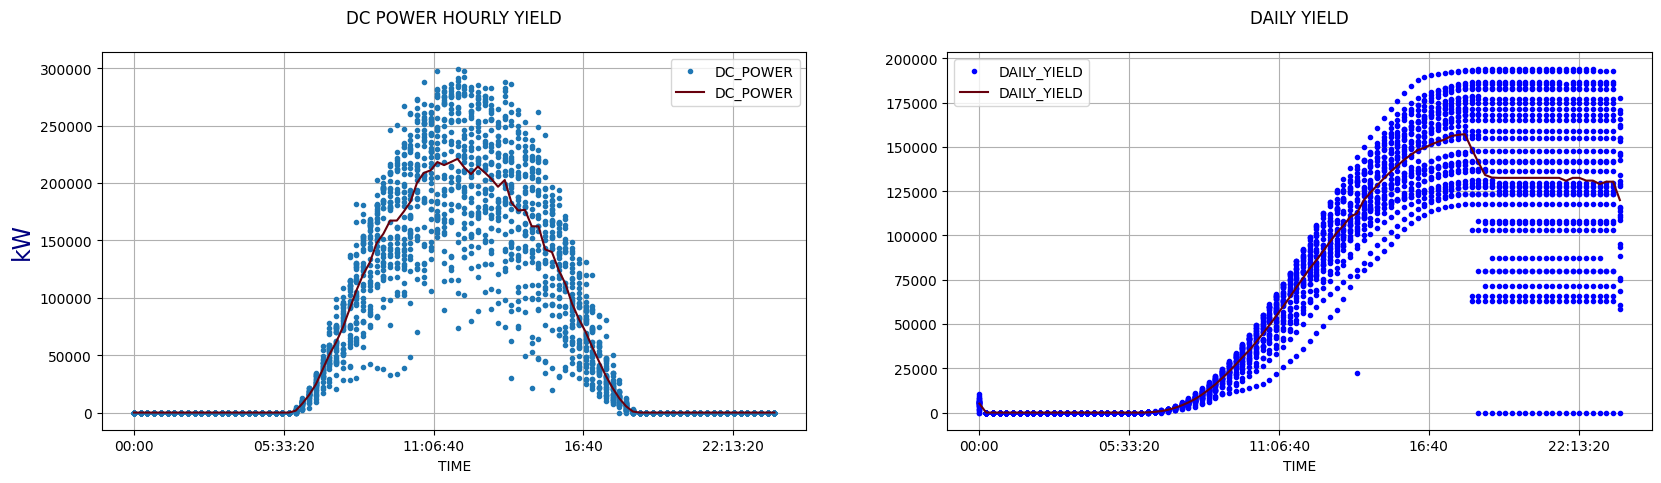

In [17]:
fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# DC hourly yield plot 
generation_data_1.plot(x= 'TIME', y='DC_POWER', style='.', ax=ax[0])
generation_data_1.groupby('TIME')['DC_POWER'].mean().plot(legend=True, colormap='Reds_r',ax=ax[0])
# Daily yield plot
generation_data_1.plot(x='TIME', y='DAILY_YIELD', style='b.', ax=ax[1])
generation_data_1.groupby('TIME')['DAILY_YIELD'].mean().plot(legend=True, colormap='Reds_r',ax=ax[1])

ax[0].grid()
ax[1].grid()
ax[0].set_title('DC POWER HOURLY YIELD\n')
ax[1].set_title('DAILY YIELD\n')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

#### 2.2 DC - AC power analysis

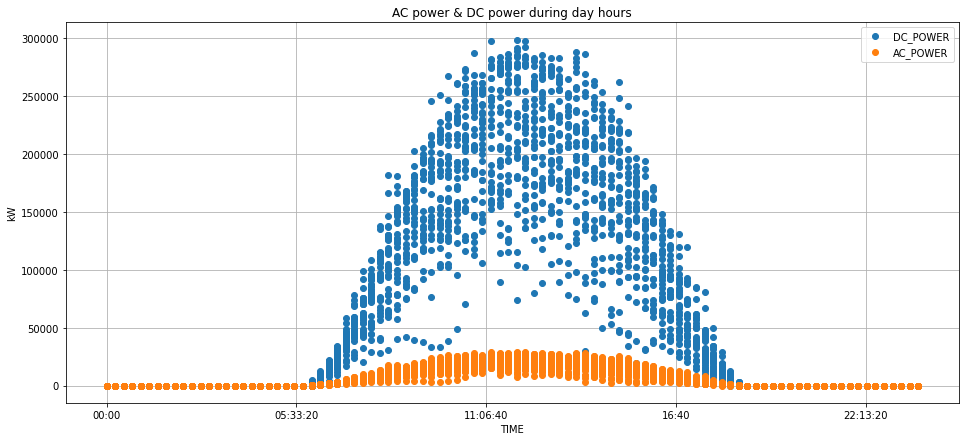

In [18]:
generation_data_1.plot(x= 'TIME', y=['DC_POWER','AC_POWER'], style='o',figsize=(16,7))
plt.title('AC power & DC power during day hours')
plt.ylabel('kW')
plt.grid()
plt.show()

In [61]:
AC_DC_conversion = generation_data_1['AC_POWER'].sum()/generation_data_1['DC_POWER'].sum()
print ('DC-AC Power conversion rate is {:.3f} %'.format(AC_DC_conversion * 100))

DC-AC Power conversion rate is 9.780 %


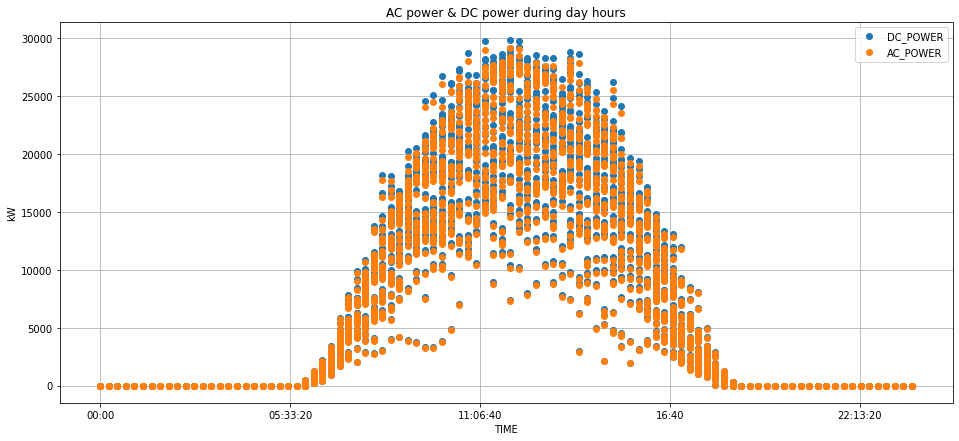

In [55]:
#DC_POWER modification. We divided the DC power by 10 and compare it to AC Power
DC_mod = generation_data_1.copy()
DC_mod['DC_POWER'] = DC_mod['DC_POWER']/10
DC_mod.plot(x= 'TIME', y=['DC_POWER','AC_POWER'], style='o',figsize=(16,7))
plt.title('AC power & DC power during day hours')
plt.ylabel('kW')
plt.grid()
plt.show()

In [62]:
AC_DC_conversion_2 = DC_mod['AC_POWER'].sum()/DC_mod['DC_POWER'].sum()
print ('DC-AC Power conversion rate is {:.3f} %'.format(AC_DC_conversion_2 * 100))

DC-AC Power conversion rate is 97.795 %


#### 2.3 Irradiation and temperature analysis

Text(0, 0.5, '°C')

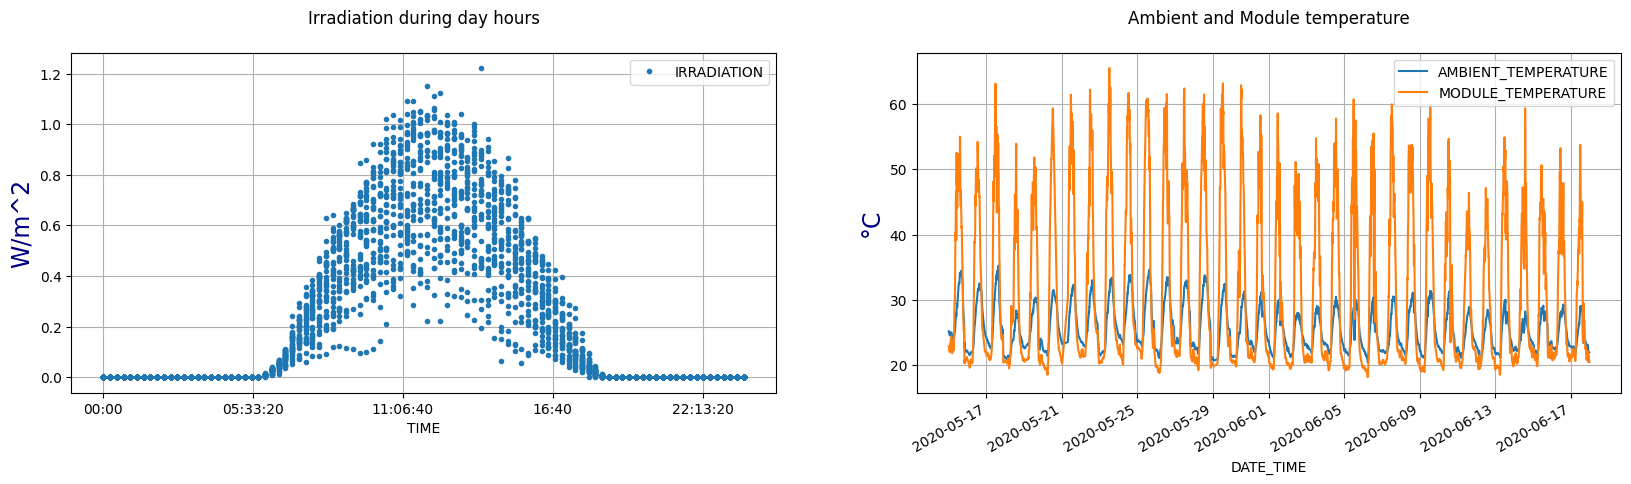

In [21]:
fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# Irradiation
weather_data_1.plot(x='TIME',y='IRRADIATION',ax=ax[0],style='.')
# Ambient a and module temperatures
weather_data_1.set_index('DATE_TIME').drop('TIME',1)[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].plot(ax=ax[1])
ax[0].grid()
ax[1].grid()
ax[0].set_title('Irradiation during day hours\n',)
ax[1].set_title('Ambient and Module temperature\n')
ax[0].set_ylabel('W/m^2',color='navy',fontsize=17)
ax[1].set_ylabel('°C',color='navy',fontsize=17)

#### 2.4 Irradiation and temperature correlation

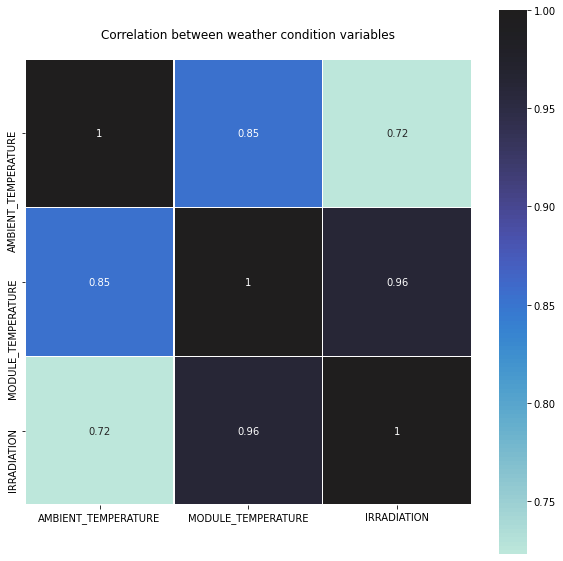

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(weather_data_1.corr(),robust=True, annot=True, center=1, linewidths=.5, square=True)
plt.title('Correlation between weather condition variables\n')
plt.show()

#### 2.4 Correlation between all variables

In [19]:
plant_data = weather_data_1.merge(generation_data_1, left_on='DATE_TIME', right_on='DATE_TIME')
plant_data.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME_x,DATE_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,TIME_y,DATE_y
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,00:00:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:00:00,2020-05-15
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,00:15:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:15:00,2020-05-15
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,00:30:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:30:00,2020-05-15
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,00:45:00,2020-05-15,0.0,0.0,0.0,143581676.0,00:45:00,2020-05-15
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,01:00:00,2020-05-15,0.0,0.0,0.0,150761642.0,01:00:00,2020-05-15


In [20]:
del plant_data['TIME_y']
del plant_data['DATE_y']
plant_data.head()

,DATE_TIME,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,TIME_x,DATE_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,25.184316,22.857507,0.0,00:00:00,2020-05-15,0.0,0.0,0.0,143581676.0
1,2020-05-15 00:15:00,25.084589,22.761668,0.0,00:15:00,2020-05-15,0.0,0.0,0.0,143581676.0
2,2020-05-15 00:30:00,24.935753,22.592306,0.0,00:30:00,2020-05-15,0.0,0.0,0.0,143581676.0
3,2020-05-15 00:45:00,24.846130,22.360852,0.0,00:45:00,2020-05-15,0.0,0.0,0.0,143581676.0
4,2020-05-15 01:00:00,24.621525,22.165423,0.0,01:00:00,2020-05-15,0.0,0.0,0.0,150761642.0


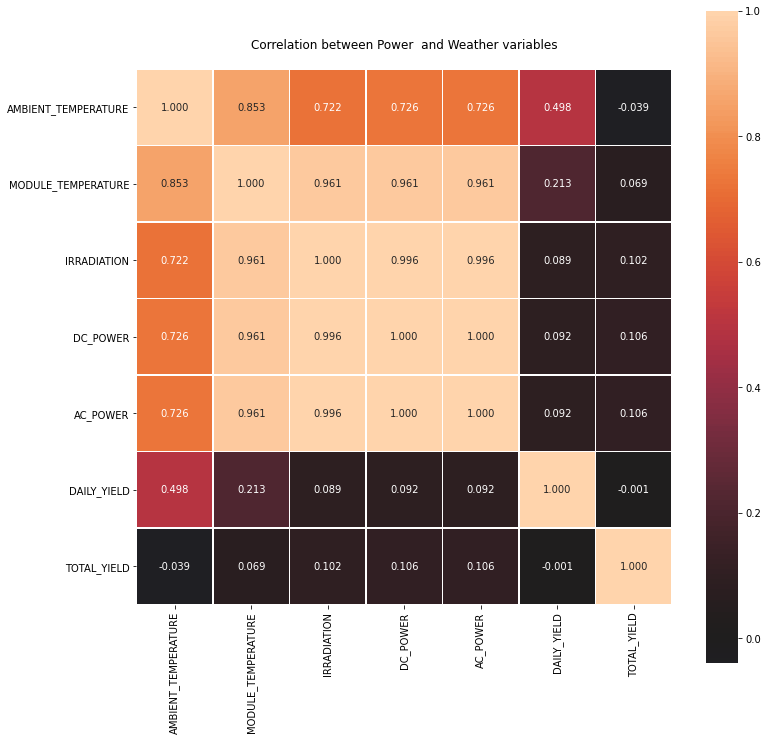

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(plant_data.corr(),robust=True, annot=True, fmt='0.3f', center=0, linewidths=.5, square=True)
plt.title('Correlation between Power  and Weather variables\n')
plt.show()

In [22]:
# Introducing new varaible. Temperature difference between Module and the ambient which represents the heat exchange between the module and the air.
plant_data_dt = plant_data.copy()
plant_data_dt['DIFF_TEMP'] = plant_data_dt['MODULE_TEMPERATURE']-plant_data_dt['AMBIENT_TEMPERATURE']

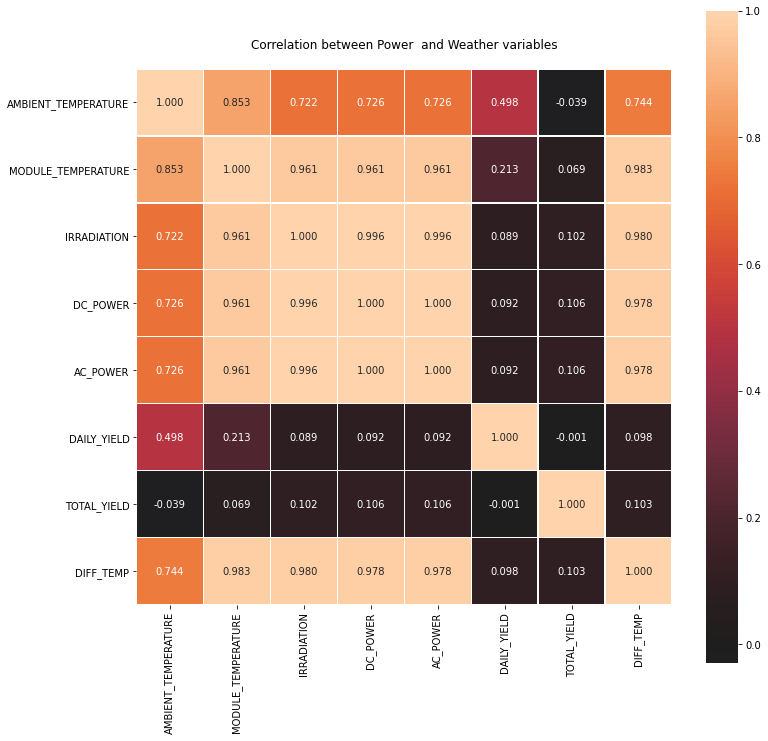

In [23]:
plt.figure(figsize=(12,12))
sns.heatmap(plant_data_dt.corr(),robust=True, annot=True, fmt='0.3f', center=0, linewidths=.5, square=True)
plt.title('Correlation between Power  and Weather variables\n')
plt.show()

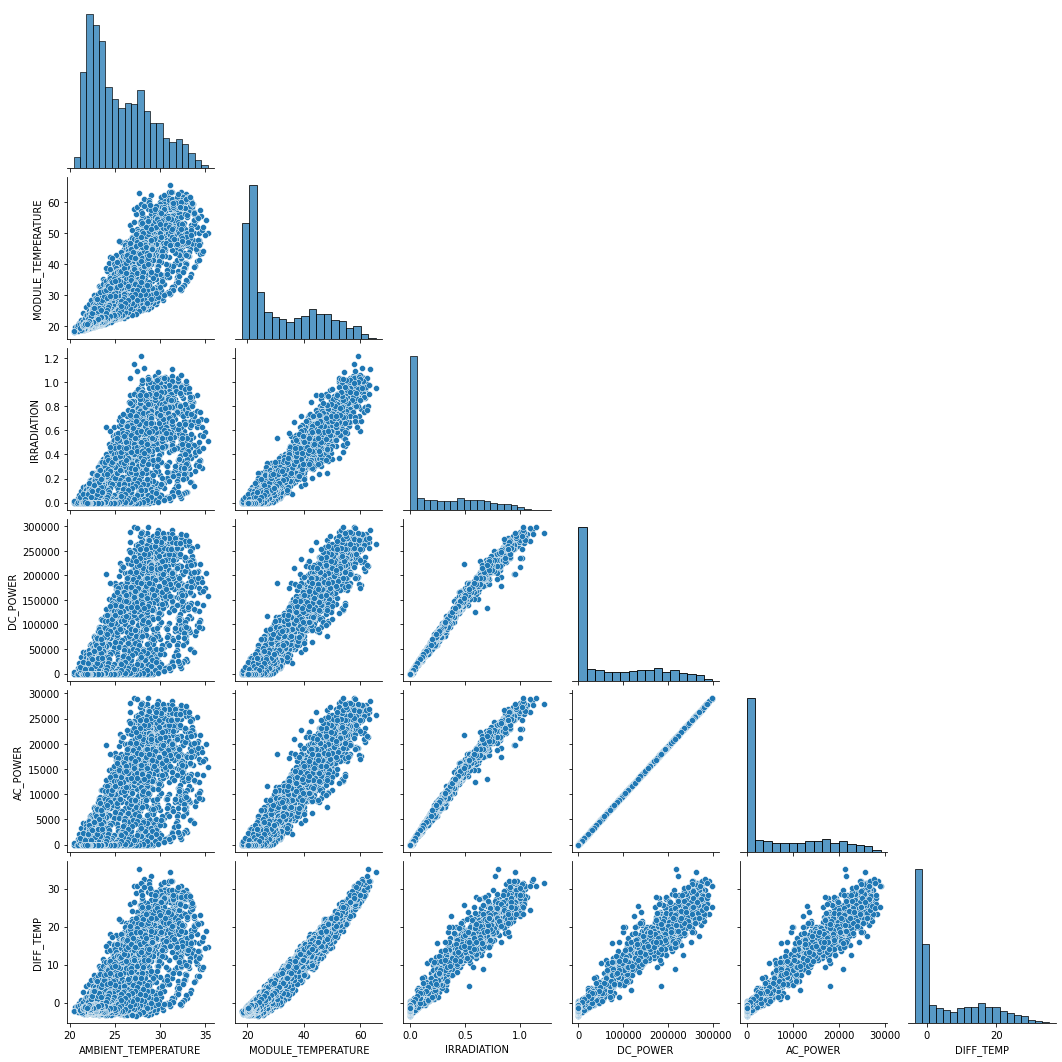

In [70]:
# I create a pair plot to see how linear the correlations are.
sns.pairplot(plant_data_dt.drop(columns=['DAILY_YIELD', 'TOTAL_YIELD']), corner=True)
plt.show()

## 3 PREDICTION USING SKLEARN MODELS

#### 3.1 PREPARATION OF THE DATA SET

In [26]:
plant_data_set = plant_data.copy()
del plant_data_set['TOTAL_YIELD']
del plant_data_set['DAILY_YIELD']
del plant_data_set['DATE_TIME']
del plant_data_set['TIME_x']
plant_data_set.head()

,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE_x,DC_POWER,AC_POWER
0,25.184316,22.857507,0.0,2020-05-15,0.0,0.0
1,25.084589,22.761668,0.0,2020-05-15,0.0,0.0
2,24.935753,22.592306,0.0,2020-05-15,0.0,0.0
3,24.846130,22.360852,0.0,2020-05-15,0.0,0.0
4,24.621525,22.165423,0.0,2020-05-15,0.0,0.0


In [27]:
pd1 = plant_data_set.groupby("DATE_x")["DC_POWER","AC_POWER", "IRRADIATION"].sum() 
pd2 = plant_data_set.groupby("DATE_x")["MODULE_TEMPERATURE","AMBIENT_TEMPERATURE"].mean()
pd1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,DC_POWER,AC_POWER,IRRADIATION
DATE_x,,,
2020-05-15,5.627239e+06,550830.959402,19.037010
2020-05-16,5.806138e+06,568359.821428,18.651690
2020-05-17,6.759595e+06,660975.389285,22.931378
2020-05-18,4.812549e+06,470969.708929,15.266485
2020-05-19,5.437955e+06,532250.491070,18.044861


In [28]:
pd2.head()

,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE
DATE_x,,
2020-05-15,32.582964,27.430823
2020-05-16,31.858851,26.780538
2020-05-17,32.740435,26.686727
2020-05-18,27.814344,23.850938
2020-05-19,29.725163,25.338021


In [29]:
plant_data_set_2 = pd1.merge(pd2, left_on='DATE_x', right_on='DATE_x')
plant_data_set_2.head()

,DC_POWER,AC_POWER,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE
DATE_x,,,,,
2020-05-15,5.627239e+06,550830.959402,19.037010,32.582964,27.430823
2020-05-16,5.806138e+06,568359.821428,18.651690,31.858851,26.780538
2020-05-17,6.759595e+06,660975.389285,22.931378,32.740435,26.686727
2020-05-18,4.812549e+06,470969.708929,15.266485,27.814344,23.850938
2020-05-19,5.437955e+06,532250.491070,18.044861,29.725163,25.338021


In [30]:
plant_data_set_2['DIFF_TEMP'] = plant_data_set_2['MODULE_TEMPERATURE']-plant_data_set_2['AMBIENT_TEMPERATURE']

In [31]:
del plant_data_set_2['AMBIENT_TEMPERATURE']
del plant_data_set_2['MODULE_TEMPERATURE']
del plant_data_set_2['AC_POWER']
plant_data_set_2.reset_index()
plant_data_set_2.head()

,DC_POWER,IRRADIATION,DIFF_TEMP
DATE_x,,,
2020-05-15,5.627239e+06,19.037010,5.152141
2020-05-16,5.806138e+06,18.651690,5.078313
2020-05-17,6.759595e+06,22.931378,6.053708
2020-05-18,4.812549e+06,15.266485,3.963406
2020-05-19,5.437955e+06,18.044861,4.387143


In [32]:
plant_data_set_2.describe()

,DC_POWER,IRRADIATION,DIFF_TEMP
count,3.400000e+01,34.000000,34.000000
mean,6.365999e+06,21.365756,5.698116
std,8.852473e+05,3.425439,1.638130
min,4.812549e+06,15.266485,3.476847
25%,5.586186e+06,18.347079,4.628234
50%,6.461499e+06,21.679352,5.393604
75%,7.133442e+06,24.603824,6.148918
max,7.898965e+06,27.231458,11.113258


#### 3.2 SPLITTING INTO TRAINING SET AND TEST SET

In [35]:
print('Total data: {0}, train set required = {1}, test set required = {2}' .format(len(plant_data_set_2), len(plant_data_set_2)*0.8, len(plant_data_set_2)*0.2))

Total data: 34, train set required = 27.200000000000003, test set required = 6.800000000000001


In [33]:
plant_data_set_2[27:]

,DC_POWER,IRRADIATION,DIFF_TEMP
DATE_x,,,
2020-06-11,5.045679e+06,15.533706,3.476847
2020-06-12,5.222354e+06,16.301551,3.513455
2020-06-13,7.593776e+06,25.389355,5.914297
2020-06-14,6.350495e+06,21.128221,5.008816
2020-06-15,6.055536e+06,19.768806,5.100403
2020-06-16,5.572501e+06,17.979125,4.626638
2020-06-17,5.317780e+06,16.934713,4.249730


In [34]:
train = plant_data_set_2[:27]
test = plant_data_set_2[27:]

In [35]:
train.head()

,DC_POWER,IRRADIATION,DIFF_TEMP
DATE_x,,,
2020-05-15,5.627239e+06,19.037010,5.152141
2020-05-16,5.806138e+06,18.651690,5.078313
2020-05-17,6.759595e+06,22.931378,6.053708
2020-05-18,4.812549e+06,15.266485,3.963406
2020-05-19,5.437955e+06,18.044861,4.387143


In [36]:
test.head()

,DC_POWER,IRRADIATION,DIFF_TEMP
DATE_x,,,
2020-06-11,5.045679e+06,15.533706,3.476847
2020-06-12,5.222354e+06,16.301551,3.513455
2020-06-13,7.593776e+06,25.389355,5.914297
2020-06-14,6.350495e+06,21.128221,5.008816
2020-06-15,6.055536e+06,19.768806,5.100403


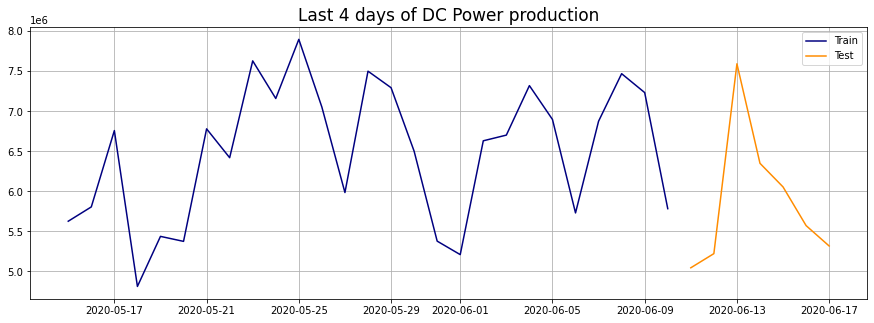

In [107]:
plt.figure(figsize=(15,5))
plt.plot(train['DC_POWER'],label='Train',color='navy')
plt.plot(test['DC_POWER'],label='Test',color='darkorange')
plt.title('Last 4 days of DC Power production',fontsize=17)
plt.grid()
plt.legend()
plt.show()

#### 3.3 RANDOM FOREST TRAIN AND PREDICT

In [60]:
test_1 = test.copy()
del test_1['DC_POWER']

In [61]:
y_train = train['DC_POWER']

In [62]:
x_train = train.drop(labels = ['DC_POWER'], axis = 1)

In [63]:
X_train , X_val , Y_train, Y_val = train_test_split(x_train,y_train, test_size= 0.2, random_state= None)

In [64]:
print(len(x_train), len(X_train), len(X_val))

27 21 6


##### 3.3.1 CREATING THE MODEL

In [76]:
rft = RandomForestRegressor(max_depth=8, random_state=None)
rft.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [77]:
print("Random Forest Regressor Acuracy = {:.3f} %".format(rft.score(X_val,Y_val)*100))

Random Forest Regressor Acuracy = 94.344 %


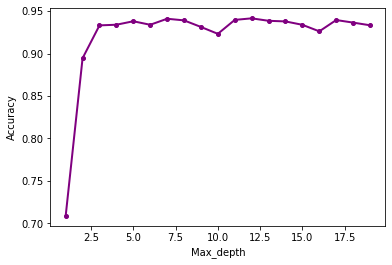

In [71]:
from sklearn.metrics import accuracy_score

score=[]
N=[]
for i in range(1,20):
    tc = RandomForestRegressor(max_depth=i, random_state=None)  
    tc.fit(X_train, Y_train)
    score.append(tc.score(X_val,Y_val))
    N.append(i)
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.plot(N,score,color='purple',marker='o', markerfacecolor='purple', markersize=4, linewidth=2)

##### 3.3.2 PREDICTING TEST DATA

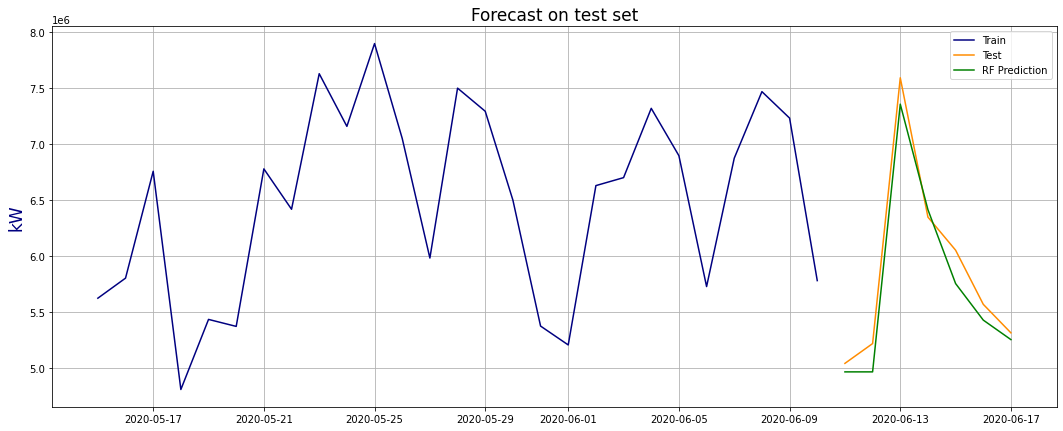

In [78]:
power_pred_1 = pd.DataFrame(rft.predict(test_1),index=test.index)
power_pred_1.columns=['Predicted_DC_POWER']

plt.figure(figsize=(18,7))
plt.plot(train['DC_POWER'],label='Train',color='navy')
plt.plot(test['DC_POWER'],label='Test',color='darkorange')
plt.plot(power_pred_1,label='RF Prediction',color='green')
plt.title('Forecast on test set',fontsize=17)
plt.ylabel('kW',color='navy',fontsize=17)
plt.grid()
plt.legend()
plt.show()

#### 3.4 LINEAR REGRESSION TRAIN AND PREDICT

##### 3.4.1 CREATING THE MODEL

In [65]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print("Linear Regression Acuracy = {:.3f} %".format(lr.score(X_val,Y_val)*100))

Linear Regression Acuracy = 98.143 %


##### 3.4.2 PREDICTING TEST DATA

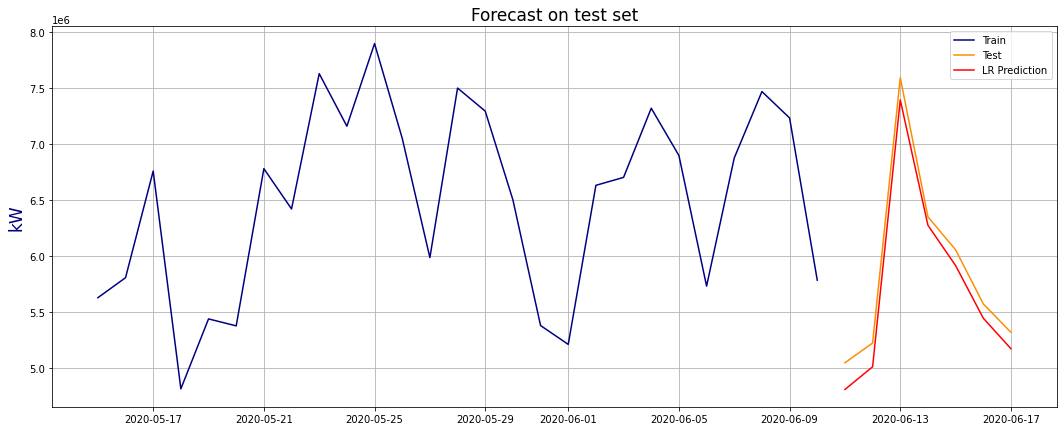

In [67]:
power_pred_2 = pd.DataFrame(lr.predict(test_1),index=test.index)
power_pred_2.columns=['Predicted_DC_POWER']

plt.figure(figsize=(18,7))
plt.plot(train['DC_POWER'],label='Train',color='navy')
plt.plot(test['DC_POWER'],label='Test',color='darkorange')
plt.plot(power_pred_2,label='LR Prediction',color='red')
plt.title('Forecast on test set',fontsize=17)
plt.ylabel('kW',color='navy',fontsize=17)
plt.grid()
plt.legend()
plt.show()

#### 3.5 MODELS COMPARISON

In [79]:
# Printing the acurracy for both models together.
print("Random Forest Regressor Acuracy = {:.3f} % \nLinear Regression Acuracy = {:.3f} %".format(rft.score(X_val,Y_val)*100, lr.score(X_val,Y_val)*100))

Random Forest Regressor Acuracy = 94.344 % 
Linear Regression Acuracy = 98.143 %


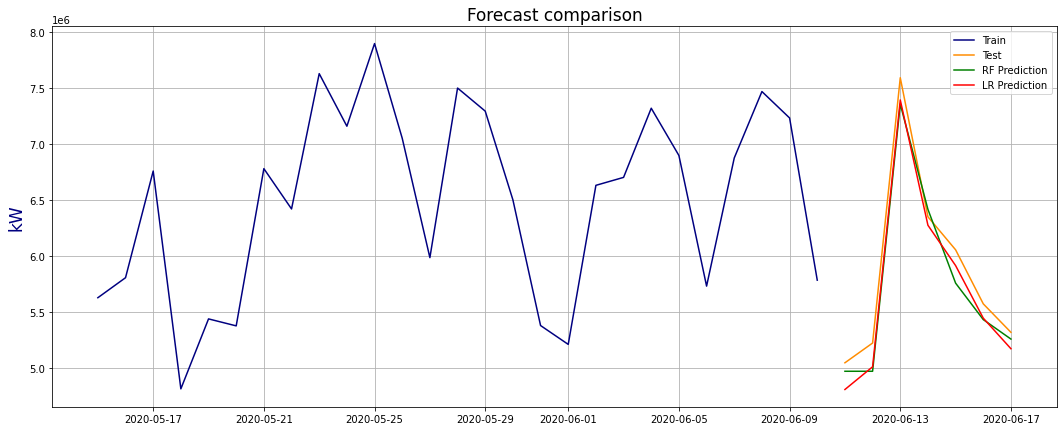

In [82]:
# Comparison betwen the predictions and the test set.
plt.figure(figsize=(18,7))
plt.plot(train['DC_POWER'],label='Train',color='navy')
plt.plot(test['DC_POWER'],label='Test',color='darkorange')
plt.plot(power_pred_1,label='RF Prediction',color='green')
plt.plot(power_pred_2,label='LR Prediction',color='red')
plt.title('Forecast comparison',fontsize=17)
plt.ylabel('kW',color='navy',fontsize=17)
plt.grid()
plt.legend()
plt.show()

In [81]:
#Table with all the values for furhter comparison
prediction_comparison = power_pred_1.merge(power_pred_2, left_on='DATE_x', right_on='DATE_x',suffixes=("_RF","_LR"))
prediction_comparison_2 = prediction_comparison.merge(test['DC_POWER'], left_on='DATE_x', right_on='DATE_x')
prediction_comparison_2

,Predicted_DC_POWER_RF,Predicted_DC_POWER_LR,DC_POWER
DATE_x,,,
2020-06-11,4.969822e+06,4.806808e+06,5.045679e+06
2020-06-12,4.969822e+06,5.009731e+06,5.222354e+06
2020-06-13,7.358365e+06,7.395215e+06,7.593776e+06
2020-06-14,6.416816e+06,6.274884e+06,6.350495e+06
2020-06-15,5.757688e+06,5.914336e+06,6.055536e+06
2020-06-16,5.431722e+06,5.444566e+06,5.572501e+06
2020-06-17,5.257562e+06,5.171246e+06,5.317780e+06
